# Importing Libraries

In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

# Load Dataset

In [2]:
# Load the Travel Insurance data

travins = pd.read_csv(r"M:\AIML DATA SETS\project-1\travel insurance.csv",header=0)

# Copy to back-up file
travins_bk = travins.copy()

# Display first 5 values

travins.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


In [3]:
travins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  object 
 1   Agency Type           48260 non-null  object 
 2   Distribution Channel  48260 non-null  object 
 3   Product Name          48260 non-null  object 
 4   Duration              48260 non-null  int64  
 5   Destination           48260 non-null  object 
 6   Net Sales             48260 non-null  float64
 7   Commision (in value)  48260 non-null  float64
 8   Gender                13899 non-null  object 
 9   Age                   48260 non-null  int64  
 10  Claim                 48260 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.1+ MB


In [4]:
travins.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  34361
Age                         0
Claim                       0
dtype: int64

# Filling Missing Values

In [5]:
# Using SimpleImputer to address the Gender missing values

from sklearn.impute import SimpleImputer

imputer_str = SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value=None, verbose=0,
                            copy=True, add_indicator=False)

travins['Gender'] = imputer_str.fit_transform(travins[['Gender']])

In [6]:
travins.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
Claim                   0
dtype: int64

In [7]:
travins

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,M,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,M,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,M,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,M,23,0
...,...,...,...,...,...,...,...,...,...,...,...
48255,EPX,Travel Agency,Online,2 way Comprehensive Plan,39,CHINA,44.0,0.00,M,36,0
48256,C2B,Airlines,Online,Bronze Plan,20,SINGAPORE,60.0,15.00,F,30,0
48257,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,19,AUSTRALIA,29.7,17.82,M,43,0
48258,EPX,Travel Agency,Online,2 way Comprehensive Plan,7,INDONESIA,20.0,0.00,M,61,0


# Encoding the values

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

travins['Agency'] = le.fit_transform(travins[['Agency']])
travins['Agency Type'] = le.fit_transform(travins[['Agency Type']])
travins['Distribution Channel'] = le.fit_transform(travins[['Distribution Channel']])
travins['Product Name'] = le.fit_transform(travins[['Product Name']])
travins['Destination'] = le.fit_transform(travins[['Destination']])
travins['Gender'] = le.fit_transform(travins[['Gender']])

In [9]:
travins

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,6,1,1,16,61,131,19.8,11.88,1,29,0
1,7,1,1,10,93,90,63.0,0.00,1,36,0
2,7,1,1,1,22,132,22.0,0.00,1,25,0
3,2,0,1,17,14,112,54.5,13.63,1,24,0
4,7,1,1,10,90,137,10.0,0.00,1,23,0
...,...,...,...,...,...,...,...,...,...,...,...
48255,7,1,1,1,39,25,44.0,0.00,1,36,0
48256,2,0,1,9,20,112,60.0,15.00,0,30,0
48257,6,1,1,16,19,4,29.7,17.82,1,43,0
48258,7,1,1,1,7,56,20.0,0.00,1,61,0


In [10]:
travins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  int32  
 1   Agency Type           48260 non-null  int32  
 2   Distribution Channel  48260 non-null  int32  
 3   Product Name          48260 non-null  int32  
 4   Duration              48260 non-null  int64  
 5   Destination           48260 non-null  int32  
 6   Net Sales             48260 non-null  float64
 7   Commision (in value)  48260 non-null  float64
 8   Gender                48260 non-null  int32  
 9   Age                   48260 non-null  int64  
 10  Claim                 48260 non-null  int64  
dtypes: float64(2), int32(6), int64(3)
memory usage: 2.9 MB


# Class Count

In [11]:
Claim_count = travins.Claim.value_counts()
print('class 0 :',Claim_count[0])
print('class 1 :',Claim_count[1])
print('proportion :',round(Claim_count[0] / Claim_count[1],2),':1')

class 0 : 47552
class 1 : 708
proportion : 67.16 :1


In [ ]:
#travins = travins.select_dtypes(include = ['float64', 'int64']) 
#travins = travins.dropna()

# Finding target variable

In [14]:
Indepvar=[]
for i in travins.columns:
    if i !='Claim' :
        Indepvar.append(i)
Targetvar='Claim'
x = travins[Indepvar]
y = travins[Targetvar]
print(x)
print(y)

       Agency  Agency Type  Distribution Channel  Product Name  Duration  \
0           6            1                     1            16        61   
1           7            1                     1            10        93   
2           7            1                     1             1        22   
3           2            0                     1            17        14   
4           7            1                     1            10        90   
...       ...          ...                   ...           ...       ...   
48255       7            1                     1             1        39   
48256       2            0                     1             9        20   
48257       6            1                     1            16        19   
48258       7            1                     1             1         7   
48259       7            1                     1             0        35   

       Destination  Net Sales  Commision (in value)  Gender  Age  
0              131  

# Sampling

In [15]:
from imblearn.over_sampling import RandomOverSampler
oversample=RandomOverSampler(sampling_strategy=0.15)
x_over,y_over=oversample.fit_resample(x,y)
print(x_over.shape)
print(y_over.shape)

(54684, 10)
(54684,)


# Splitting the data

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, stratify=y, random_state = 52)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((33782, 10), (14478, 10), (33782,), (14478,))

# Scaling the data

In [17]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [18]:
P_Results = pd.read_csv(r"M:\AIML DATA SETS\project-1\P_Results.csv")
P_Results.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# Model

Model Name:  LogisticRegression()
Confusion matrix : 
 [[    0   212]
 [    3 14263]]
Outcome values : 
 0 212 3 14263
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       212
           0       0.99      1.00      0.99     14266

    accuracy                           0.99     14478
   macro avg       0.49      0.50      0.50     14478
weighted avg       0.97      0.99      0.98     14478

Accuracy : 98.5 %
Precision : 0.0 %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : -0.002
roc_auc_score: 0.5


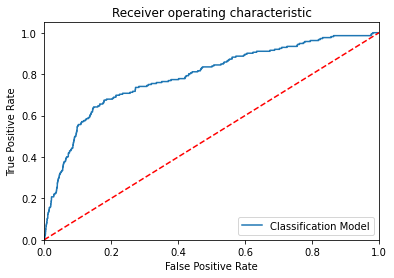

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[    9   203]
 [  237 14029]]
Outcome values : 
 9 203 237 14029
Classification report : 
               precision    recall  f1-score   support

           1       0.04      0.04      0.04       212
           0       0.99      0.98      0.98     14266

    accuracy                           0.97     14478
   macro avg       0.51      0.51      0.51     14478
weighted avg       0.97      0.97      0.97     14478

Accuracy : 97.0 %
Precision : 3.7 %
Recall : 4.2 %
F1 Score : 0.039
Specificity or True Negative Rate : 98.3 %
Balanced Accuracy : 51.2 %
MCC : 0.024
roc_auc_score: 0.513


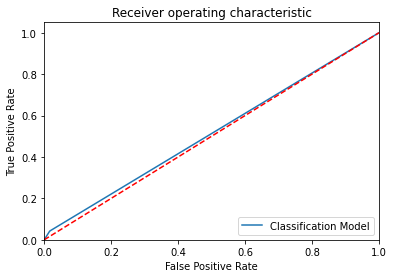

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[    0   212]
 [    0 14266]]
Outcome values : 
 0 212 0 14266
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       212
           0       0.99      1.00      0.99     14266

    accuracy                           0.99     14478
   macro avg       0.49      0.50      0.50     14478
weighted avg       0.97      0.99      0.98     14478

Accuracy : 98.5 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


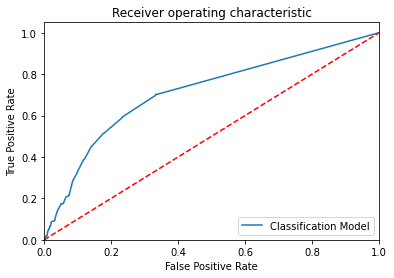

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[    0   212]
 [    3 14263]]
Outcome values : 
 0 212 3 14263
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       212
           0       0.99      1.00      0.99     14266

    accuracy                           0.99     14478
   macro avg       0.49      0.50      0.50     14478
weighted avg       0.97      0.99      0.98     14478

Accuracy : 98.5 %
Precision : 0.0 %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : -0.002
roc_auc_score: 0.5


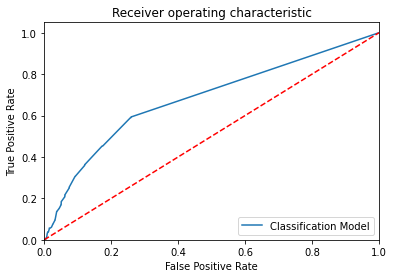

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[    1   211]
 [    6 14260]]
Outcome values : 
 1 211 6 14260
Classification report : 
               precision    recall  f1-score   support

           1       0.14      0.00      0.01       212
           0       0.99      1.00      0.99     14266

    accuracy                           0.99     14478
   macro avg       0.56      0.50      0.50     14478
weighted avg       0.97      0.99      0.98     14478

Accuracy : 98.5 %
Precision : 14.3 %
Recall : 0.5 %
F1 Score : 0.009
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.2 %
MCC : 0.023
roc_auc_score: 0.502


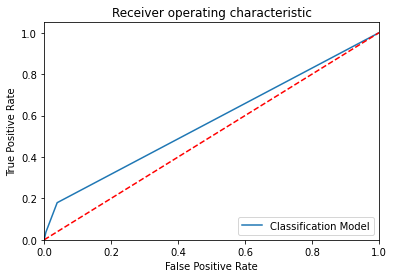

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[    0   212]
 [    0 14266]]
Outcome values : 
 0 212 0 14266
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       212
           0       0.99      1.00      0.99     14266

    accuracy                           0.99     14478
   macro avg       0.49      0.50      0.50     14478
weighted avg       0.97      0.99      0.98     14478

Accuracy : 98.5 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


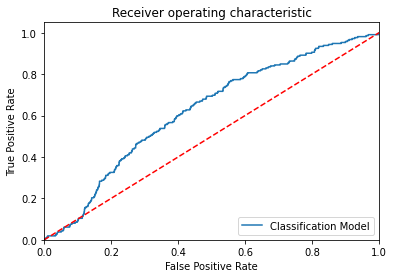

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[    0   212]
 [   19 14247]]
Outcome values : 
 0 212 19 14247
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       212
           0       0.99      1.00      0.99     14266

    accuracy                           0.98     14478
   macro avg       0.49      0.50      0.50     14478
weighted avg       0.97      0.98      0.98     14478

Accuracy : 98.4 %
Precision : 0.0 %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 50.0 %
MCC : -0.004
roc_auc_score: 0.499


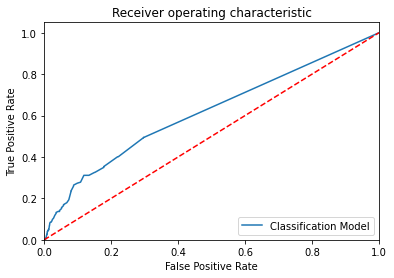

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[    9   203]
 [  151 14115]]
Outcome values : 
 9 203 151 14115
Classification report : 
               precision    recall  f1-score   support

           1       0.06      0.04      0.05       212
           0       0.99      0.99      0.99     14266

    accuracy                           0.98     14478
   macro avg       0.52      0.52      0.52     14478
weighted avg       0.97      0.98      0.97     14478

Accuracy : 97.6 %
Precision : 5.6 %
Recall : 4.2 %
F1 Score : 0.048
Specificity or True Negative Rate : 98.9 %
Balanced Accuracy : 51.6 %
MCC : 0.037
roc_auc_score: 0.516


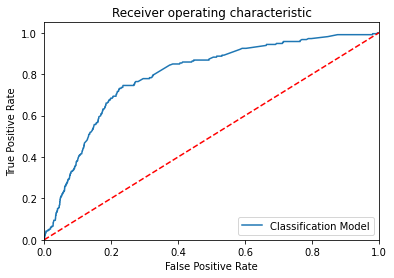

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[    1   211]
 [    5 14261]]
Outcome values : 
 1 211 5 14261
Classification report : 
               precision    recall  f1-score   support

           1       0.17      0.00      0.01       212
           0       0.99      1.00      0.99     14266

    accuracy                           0.99     14478
   macro avg       0.58      0.50      0.50     14478
weighted avg       0.97      0.99      0.98     14478

Accuracy : 98.5 %
Precision : 16.7 %
Recall : 0.5 %
F1 Score : 0.009
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.2 %
MCC : 0.026
roc_auc_score: 0.502


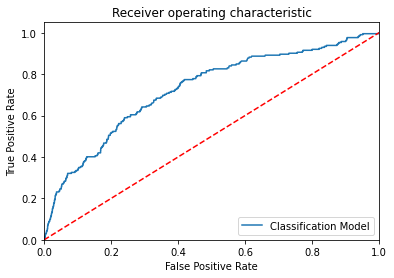

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[   49   163]
 [  591 13675]]
Outcome values : 
 49 163 591 13675
Classification report : 
               precision    recall  f1-score   support

           1       0.08      0.23      0.12       212
           0       0.99      0.96      0.97     14266

    accuracy                           0.95     14478
   macro avg       0.53      0.59      0.54     14478
weighted avg       0.97      0.95      0.96     14478

Accuracy : 94.8 %
Precision : 7.7 %
Recall : 23.1 %
F1 Score : 0.115
Specificity or True Negative Rate : 95.9 %
Balanced Accuracy : 59.5 %
MCC : 0.111
roc_auc_score: 0.595


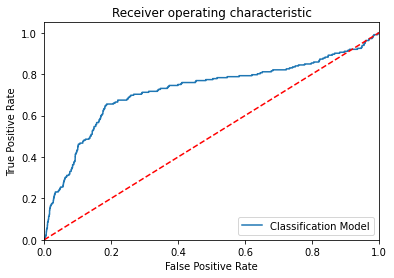

-----------------------------------------------------------------------------------------------------


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)

modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)

ModelGB = GradientBoostingClassifier()
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, modelBAG, ModelGB, ModelLGB, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    P_Results = P_Results.append(new_row, ignore_index=True)

# Result

In [20]:
P_Results.to_csv("M:\AIML DATA SETS\project-1\P_Results.csv")

P_Results

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),0,212,3,14263,0.985,0.0,0.0,0.0,1.0,-0.002,0.499895,0.5
1,DecisionTreeClassifier(),9,203,237,14029,0.97,0.037,0.042,0.039,0.983,0.024,0.51292,0.512
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0,212,0,14266,0.985,NaN,0.0,0.0,1.0,NaN,0.5,0.5
3,"(ExtraTreeClassifier(random_state=1543810426),...",0,212,3,14263,0.985,0.0,0.0,0.0,1.0,-0.002,0.499895,0.5
4,KNeighborsClassifier(),1,211,6,14260,0.985,0.143,0.005,0.009,1.0,0.023,0.502148,0.502
5,SVC(probability=True),0,212,0,14266,0.985,NaN,0.0,0.0,1.0,NaN,0.5,0.5
6,(DecisionTreeClassifier(random_state=789856945...,0,212,19,14247,0.984,0.0,0.0,0.0,0.999,-0.004,0.499334,0.5
7,([DecisionTreeRegressor(criterion='friedman_ms...,9,203,151,14115,0.976,0.056,0.042,0.048,0.989,0.037,0.515934,0.516
8,LGBMClassifier(),1,211,5,14261,0.985,0.167,0.005,0.009,1.0,0.026,0.502183,0.502
9,GaussianNB(),49,163,591,13675,0.948,0.077,0.231,0.115,0.959,0.111,0.594852,0.595
